> # **PREPROCESSING**

In [30]:
# Data

import pandas as pd
import numpy as np

df = pd.read_csv('sms_spam_collection.csv')
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
# Dictionary

contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [32]:
# Pre Processing Data 

import re
import nltk
from string import punctuation
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

def to_lower(text):
    return text.lower()



def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text


def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

def to_strip(text):
    return " ".join(text.split())

def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akbarezamuhammad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akbarezamuhammad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
# Final Function

def Pre_1 (text) :
    txt = to_lower(text)
    txt = main_contraction(txt)
    txt = remove_numbers(txt)
    txt = remove_punct(txt)
    txt = to_strip(txt)
    txt = remove_stopwords(txt)

    return txt

df['PrePros 1'] = df['message'].apply(Pre_1)
df.head()

,label,message,PrePros 1
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [34]:
# Steaming

from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer('english')

def stem(text):
    """
    :param word_tokens:
    :return: list of words
    """
    stemmed_word = [snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(stemmed_word)

In [35]:
# Lemma

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(lemmatized_word)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akbarezamuhammad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
# Data Clean

df['Final'] = df['PrePros 1'].apply(lemmatize)
df.head()

,label,message,PrePros 1,Final
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,nah think go usf life around though


> # **EXPLORATION**

In [37]:
# Library

from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

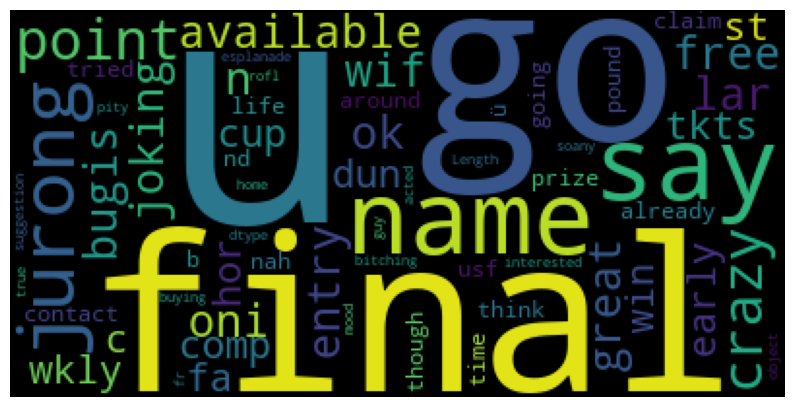

In [38]:
# Fungsi Wordcloud

def plotCloud (wordcloud) :
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")

word_cloud = WordCloud().generate(str(df['Final']))
plotCloud(word_cloud)

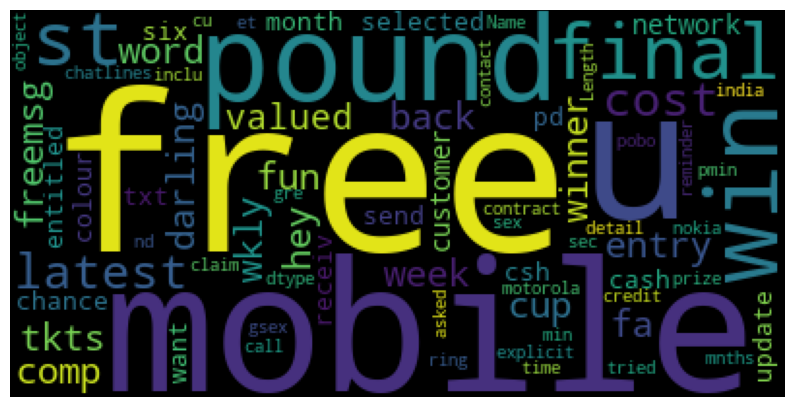

In [39]:
# Word Cloud Spam

plotCloud(WordCloud().generate(str(df[df['label'] == 'spam']['Final'])))

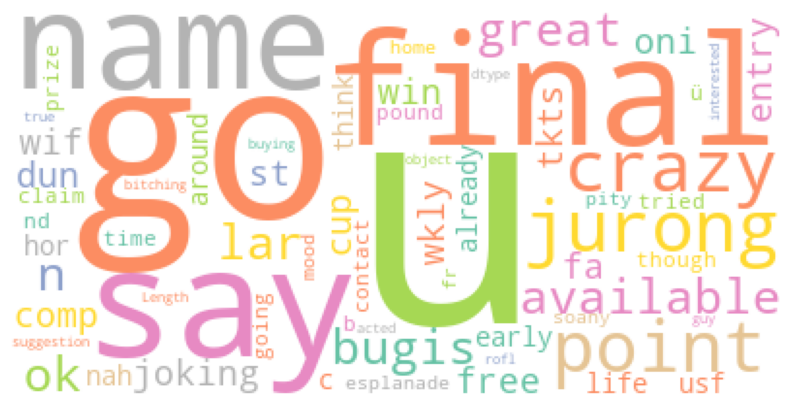

In [40]:
word_cloud = WordCloud(
    background_color = 'white', colormap = 'Set2'
).generate(str(df['Final']))
plotCloud(word_cloud)

,label,message,PrePros 1,Final,Length
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...,111
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...,155
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say early hor u c already say,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,nah think go usf life around though,61


VISUALISASI PANJANG KATA
____________________________________________________________________________________________________


/var/folders/tp/91my4k8n68z60sh31dbxcf1r0000gn/T/ipykernel_13268/1604324788.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['label']=='spam']['Length'])
/var/folders/tp/91my4k8n68z60sh31dbxcf1r0000gn/T/ipykernel_13268/1604324788.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[

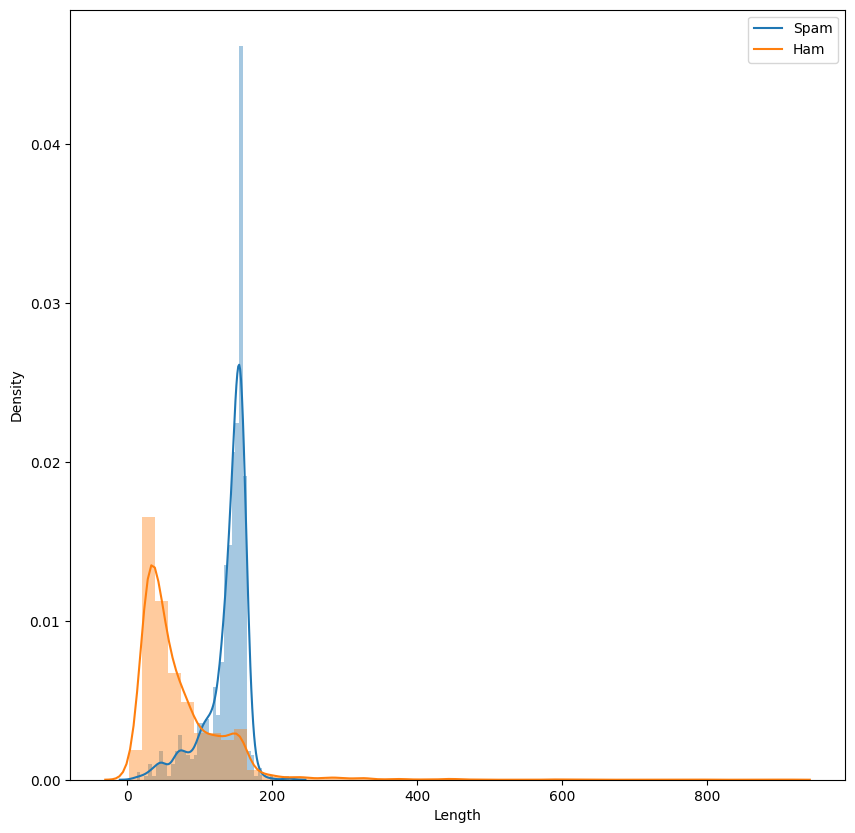

In [41]:
# Message Length

df['Length'] = df['message'].apply(len)
display(df.head())

print ('VISUALISASI PANJANG KATA')
print ('_'*100)

plt.figure(figsize=(10,10))
sns.distplot(df[df['label']=='spam']['Length'])
sns.distplot(df[df['label']=='ham']['Length'])
plt.legend(['Spam', 'Ham'])

plt.show()

/var/folders/tp/91my4k8n68z60sh31dbxcf1r0000gn/T/ipykernel_13268/3546256203.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(syarat[syarat['label']=='spam']['Length'])
/var/folders/tp/91my4k8n68z60sh31dbxcf1r0000gn/T/ipykernel_13268/3546256203.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

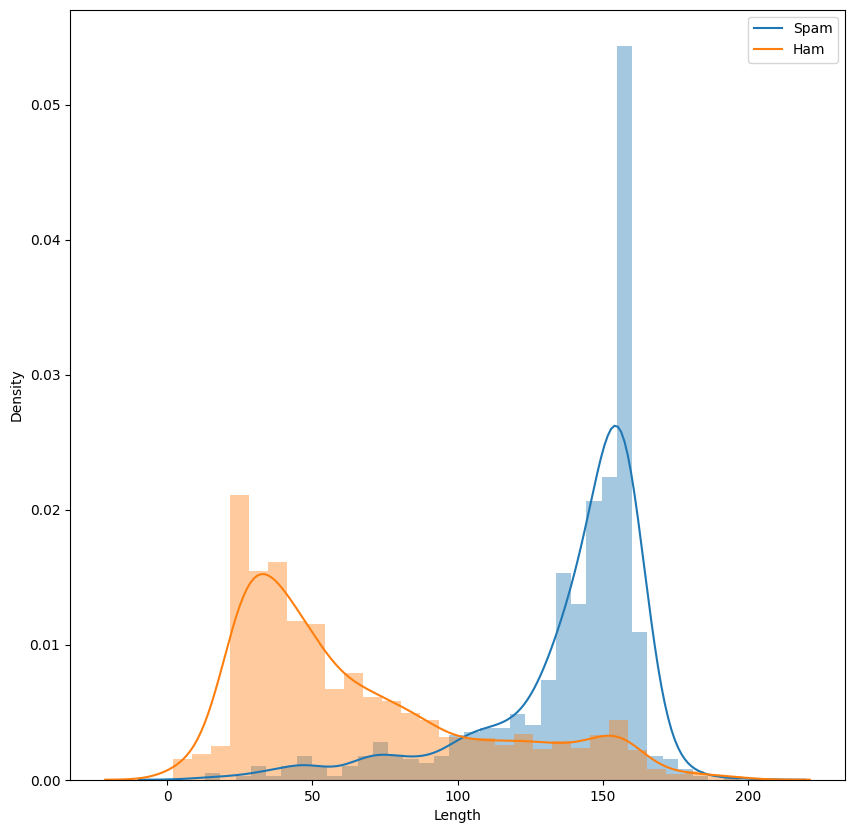

In [42]:
# Message Length < 200

plt.figure(figsize=(10,10))
syarat = df[df['Length'] < 200]
sns.distplot(syarat[syarat['label']=='spam']['Length'])
sns.distplot(syarat[syarat['label']=='ham']['Length'])
plt.legend(['Spam', 'Ham'])

plt.show()

> # **TEXT CLASSIFICATION**

In [43]:
# Library

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [56]:
# Word Sample

sample = ["fun learn fun",
          "can do this all day",
          "hate this feeling",
          "Football for fun"  
            ]
sample

['fun learn fun',
 'can do this all day',
 'hate this feeling',
 'Football for fun']

In [51]:
vec.get_feature_names_out

<bound method CountVectorizer.get_feature_names_out of CountVectorizer()>

In [52]:
# TF

vec = CountVectorizer()
vec.fit(sample)
a = vec.transform(sample)
pd.DataFrame(a.toarray(), columns = vec.get_feature_names_out())

,all,can,day,do,feeling,football,for,fun,hate,learn,this
0,0,0,0,0,0,0,0,2,0,1,0
1,1,1,1,1,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,1,1,1,0,0,0


In [54]:
# TF

vec = TfidfVectorizer()
vec.fit(sample)
a = vec.transform(sample)
pd.DataFrame(a.toarray(), columns = vec.get_feature_names_out())

,all,can,day,do,feeling,football,for,fun,hate,learn,this
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.844493,0.000000,0.535566,0.000000
1,0.465162,0.465162,0.465162,0.465162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.366739
2,0.000000,0.000000,0.000000,0.000000,0.617614,0.000000,0.000000,0.000000,0.617614,0.000000,0.486934
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.617614,0.617614,0.486934,0.000000,0.000000,0.000000


In [55]:
# Model

data_akhir = df[['label', 'Final']]
data_akhir['Label_Encode'] = np.where(data_akhir['label'] == 'spam', 1,0)
data_akhir

/var/folders/tp/91my4k8n68z60sh31dbxcf1r0000gn/T/ipykernel_13268/3752322166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_akhir['Label_Encode'] = np.where(data_akhir['label'] == 'spam', 1,0)


,label,Final,Label_Encode
0,ham,go jurong point crazy available bugis n great ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry wkly comp win fa cup final tkts st ...,1
3,ham,u dun say early hor u c already say,0
4,ham,nah think go usf life around though,0
...,...,...,...
5567,spam,nd time tried contact u u £ pound prize claim ...,1
5568,ham,ü b going esplanade fr home,0
5569,ham,pity mood soany suggestion,0
5570,ham,guy bitching acted like interested buying some...,0


In [ ]:
data_akhir['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
# Data Spliting

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    data_akhir['Final'],
    data_akhir['Label_Encode'],
    stratify=data_akhir['Label_Encode']
)

In [ ]:
# Model

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

tfidf = TfidfVectorizer()
model = LogisticRegression()

pipe = Pipeline([
    ('prepros', tfidf),
    ('model', model)
])

pipe.fit(xtrain, ytrain)
pred = pipe.predict(xtest)
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1206
           1       0.98      0.73      0.83       187

    accuracy                           0.96      1393
   macro avg       0.97      0.86      0.91      1393
weighted avg       0.96      0.96      0.96      1393



## **TUGAS**

- Install dan Import Sastrawi/nlp_id
- Gunakan kolom "Isi"
- Lakukan preprocessing terutama bagian Steamming/Lemmatization
- Buat Model
- Tambahkan ke dalam pipeline untuk balancing dengan metode random oversampling
- Buat hyperparameter tuning untuk model diatas!